<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/ML_5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features].copy()

In [ ]:
X = X.fillna(X.mean())

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
df['Cluster'] = clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print("\nPoints per cluster:")
print(df['Cluster'].value_counts().sort_index())

Number of clusters: 6
Number of noise points: 60

Points per cluster:
Cluster
-1    60
 0    17
 1     5
 2    51
 3    28
 4    32
 5     7
Name: count, dtype: int64


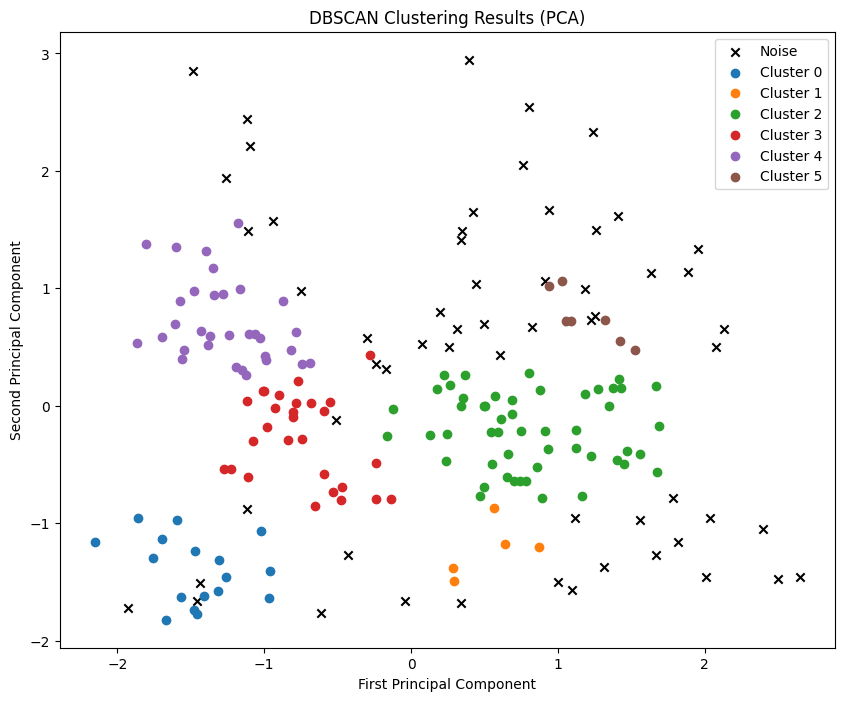

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[clusters == -1, 0], X_pca[clusters == -1, 1],
           c='black', marker='x', label='Noise')
for i in range(n_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1],
               marker='o', label=f'Cluster {i}')

plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


Clustering Metrics:
K-means Silhouette Score: 0.555
DBSCAN Silhouette Score: 0.421

K-means number of clusters: 5
DBSCAN number of clusters: 1
DBSCAN number of noise points: 5


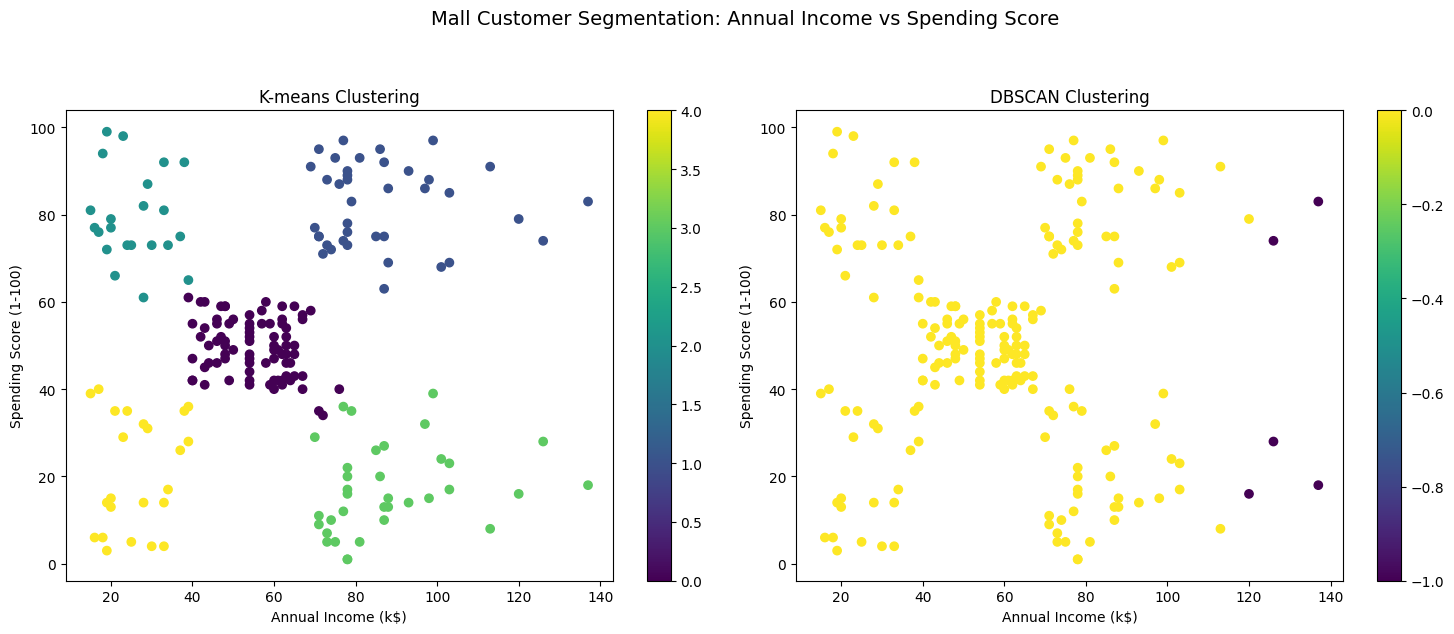


K-means Cluster Statistics:
               Annual Income (k$)       Spending Score (1-100)
                             mean count                   mean
KMeans_Cluster                                                
0                           55.30    81                  49.52
1                           86.54    39                  82.13
2                           25.73    22                  79.36
3                           88.20    35                  17.11
4                           26.30    23                  20.91

DBSCAN Cluster Statistics:
               Annual Income (k$)       Spending Score (1-100)
                             mean count                   mean
DBSCAN_Cluster                                                
-1                          129.2     5                  43.80
 0                           58.8   195                  50.36


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
file_path = 'Mall_customers.csv'
def load_and_preprocess_data(file_path):
    # Load the data from CSV
    df = pd.read_csv(file_path)

    # Select features for clustering
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

def perform_kmeans(X_scaled, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
    return kmeans_labels, silhouette_avg

def perform_dbscan(X_scaled, eps=0.6, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else 0
    return dbscan_labels, silhouette_avg

def plot_clusters_comparison(X_scaled, df, kmeans_labels, dbscan_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Original data points for plotting
    income = df['Annual Income (k$)']
    spending = df['Spending Score (1-100)']

    # K-means plot
    scatter_kmeans = ax1.scatter(income, spending,
                               c=kmeans_labels, cmap='viridis')
    ax1.set_xlabel('Annual Income (k$)')
    ax1.set_ylabel('Spending Score (1-100)')
    ax1.set_title('K-means Clustering')
    plt.colorbar(scatter_kmeans, ax=ax1)

    # DBSCAN plot
    scatter_dbscan = ax2.scatter(income, spending,
                               c=dbscan_labels, cmap='viridis')
    ax2.set_xlabel('Annual Income (k$)')
    ax2.set_ylabel('Spending Score (1-100)')
    ax2.set_title('DBSCAN Clustering')
    plt.colorbar(scatter_dbscan, ax=ax2)

    plt.suptitle('Mall Customer Segmentation: Annual Income vs Spending Score',
                fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

# Load and preprocess data
X_scaled, df = load_and_preprocess_data("Mall_Customers.csv")

# Perform clustering
kmeans_labels, kmeans_silhouette = perform_kmeans(X_scaled)
dbscan_labels, dbscan_silhouette = perform_dbscan(X_scaled)

# Print clustering metrics
print("\nClustering Metrics:")
print(f"K-means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
print(f"\nK-means number of clusters: {len(np.unique(kmeans_labels))}")
print(f"DBSCAN number of clusters: {len(np.unique(dbscan_labels[dbscan_labels >= 0]))}")
print(f"DBSCAN number of noise points: {np.sum(dbscan_labels == -1)}")

# Plot side-by-side comparison
plot_clusters_comparison(X_scaled, df, kmeans_labels, dbscan_labels)

# Add cluster labels to original dataframe
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Calculate cluster statistics
kmeans_stats = df.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': ['mean', 'count'],
    'Spending Score (1-100)': 'mean'
}).round(2)

dbscan_stats = df.groupby('DBSCAN_Cluster').agg({
    'Annual Income (k$)': ['mean', 'count'],
    'Spending Score (1-100)': 'mean'
}).round(2)

print("\nK-means Cluster Statistics:")
print(kmeans_stats)
print("\nDBSCAN Cluster Statistics:")
print(dbscan_stats)